In [2]:
import pandas as pd
import numpy as np

In [3]:
df_path = "input/ZA5798_v1-0-0.dta" # url: https://search.gesis.org/research_data/ZA5798
df = pd.read_stata(df_path, convert_categoricals = False)
print(df.shape)

(26573, 226)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26573 entries, 0 to 26572
Columns: 226 entries, studyno to wex
dtypes: float64(104), int16(2), int32(2), int8(116), object(2)
memory usage: 24.9+ MB


In [5]:
df.columns

Index(['studyno', 'version', 'survey', 'caseid', 'uniqid', 'countid',
       'country', 'isocntry', 'phone', 'q1',
       ...
       'w14', 'w22', 'w24', 'w29', 'w30', 'w81', 'w82', 'w89', 'w90', 'wex'],
      dtype='object', length=226)

In [6]:
df.columns.values.tolist()

['studyno',
 'version',
 'survey',
 'caseid',
 'uniqid',
 'countid',
 'country',
 'isocntry',
 'phone',
 'q1',
 'q2_1',
 'q2_2',
 'q2_3',
 'q2_4',
 'q2b',
 'q2c',
 'q2d',
 'q3',
 'q4_1',
 'q4_2',
 'q4_3',
 'q4_4',
 'q4_5',
 'q4_6',
 'q4_7',
 'q4_8',
 'q4_9',
 'q5',
 'q6',
 'q7_1',
 'q7_2',
 'q7_3',
 'q7_4',
 'q7_5',
 'q7_6',
 'q7_7',
 'q7_8',
 'q7_9',
 'q7_10',
 'q7_11',
 'q8_1',
 'q8_2',
 'q8_3',
 'q8_4',
 'q8_5',
 'q8_6',
 'q8_7',
 'q8_8',
 'q8_9',
 'q8_10',
 'q9',
 'q10',
 'q11_1',
 'q11_2',
 'q11_3',
 'q11_4',
 'q11_5',
 'q11_6',
 'q11_7',
 'q11_8',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18_1',
 'q18_2',
 'q18_3',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'vd1',
 'd1r1',
 'd1r2',
 'd2',
 'd3a_1',
 'd3a_2',
 'd3a_3',
 'd3a_4',
 'd3a_5',
 'd3a_6',
 'd3a_7',
 'd3a_8',
 'd3a_9',
 'd3a_10',
 'd3a_11',
 'd3a_12',
 'd3a_13',
 'd3a_14',
 'd3a_15',
 'd3a_16',
 'd3a_17',
 'd3a_18',
 'd3a_19',
 'd3a_20',
 'd3a_21',
 'd3a_22',
 'd3a_23',
 'd3a_24',
 'd3a_25',
 'd3a_26',
 'd3a_27',
 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Missing values in Data')

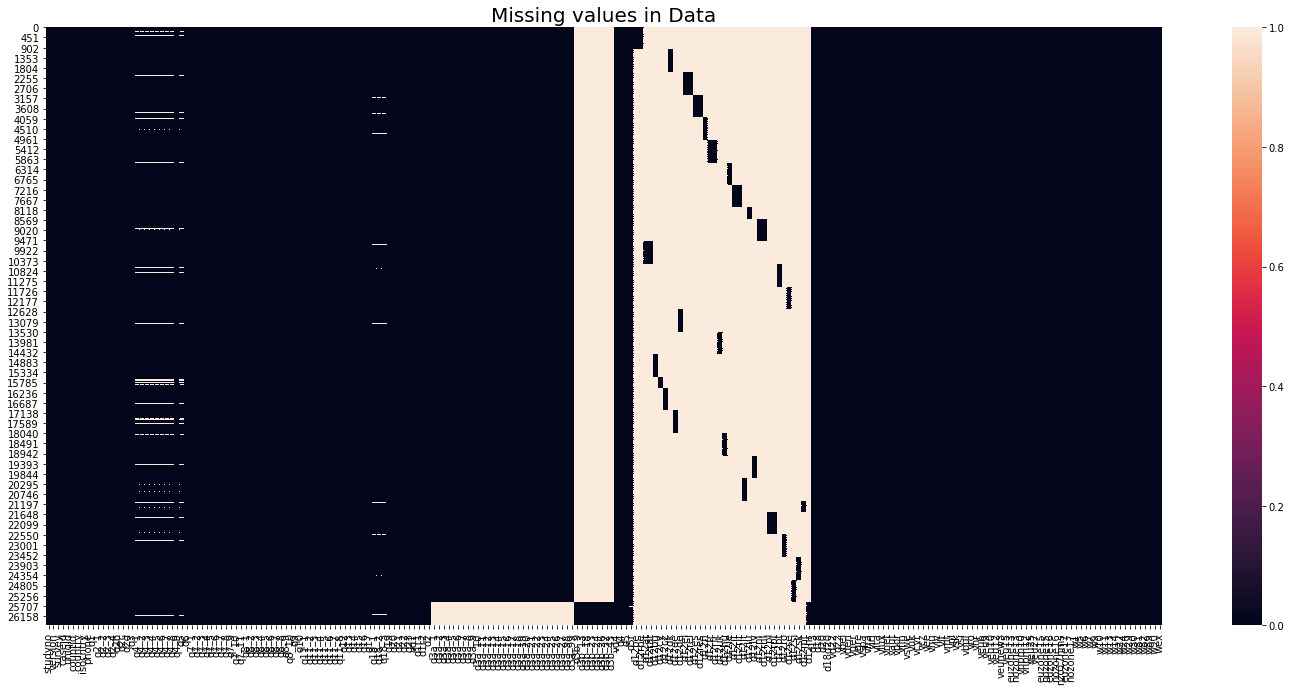

In [8]:
#code copied from https://www.kaggle.com/usharengaraju/wids2022-lgbm-starter-w-b
names = df.columns
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, xticklabels=df.columns)
plt.title("Missing values in Data", size=20)

In [9]:
# number of observations per country
df.groupby(by = 'isocntry').size()
# store as df
df.groupby(by = 'isocntry').size().reset_index(name = 'counts')

,isocntry,counts
0,AT,1002
1,BE,1001
2,BG,1003
3,CY,503
4,CZ,1000
5,DE,1001
6,DK,1018
7,EE,1000
8,ES,1000
9,FI,1001


In [10]:
# check queries
# https://coderzcolumn.com/tutorials/python/pandas-query-function-query-pandas-dataframe-using-python-expressions
sel_countries = ["ES", "GB"]
df_analysis = df.query('isocntry in @sel_countries') # selected countries

In [11]:
# number of observations per country
df_analysis.groupby(by = 'isocntry').size()
# store as df
df_analysis.groupby(by = 'isocntry').size().reset_index(name = 'counts')

,isocntry,counts
0,ES,1000
1,GB,1001


In [12]:
df_analysis.groupby('isocntry')['q6'].value_counts(normalize = True)

isocntry  q6
ES        2     0.409000
          1     0.311000
          3     0.196000
          4     0.037000
          5     0.030000
          6     0.017000
GB        2     0.413586
          1     0.257742
          3     0.216783
          4     0.052947
          6     0.029970
          5     0.028971
Name: q6, dtype: float64

In [13]:
df_analysis.to_csv("input/data.csv") #output data

In [14]:
questions = ["isocntry", "q2_1", "q4_1", "q4_2", "q4_3", "q4_4", "q4_5", "q4_6", "q4_7", "q4_8", "q10", "q5", "q6"]
df_final = df_analysis.filter(questions)
df_final

,isocntry,q2_1,q4_1,q4_2,q4_3,q4_4,q4_5,q4_6,q4_7,q4_8,q10,q5,q6
3021,ES,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4,2.0,2
3022,ES,2,3.0,1.0,2.0,3.0,2.0,1.0,1.0,4.0,3,3.0,2
3023,ES,1,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,2,2.0,1
3024,ES,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0,2
3025,ES,4,2.0,1.0,1.0,2.0,4.0,3.0,3.0,3.0,3,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14538,GB,4,2.0,1.0,2.0,1.0,2.0,2.0,1.0,3.0,4,2.0,4
14539,GB,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2.0,2
14540,GB,1,2.0,3.0,2.0,3.0,1.0,1.0,4.0,3.0,3,2.0,3
14541,GB,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3,2.0,3


In [15]:
df_final.columns

Index(['isocntry', 'q2_1', 'q4_1', 'q4_2', 'q4_3', 'q4_4', 'q4_5', 'q4_6',
       'q4_7', 'q4_8', 'q10', 'q5', 'q6'],
      dtype='object')

In [16]:
df_final = df_final.rename(columns={'q2_1': 'att1', 'q4_1': 'att2', 'q4_2': 'att3','q4_3': 'mo1', 'q4_4': 'pcb1', 'q4_5': 'mo2', 'q4_6': 'att4', 'q4_7': 'sn1', 'q4_8': 'pcb2', 'q10': 'pcb3', 'q5': 'pcb4', 'q6': 'wtp'})

In [17]:
# import pandas as pd
from factor_analyzer import FactorAnalyzer

In [18]:

# in case of needed for replacing values
# df_transformed = df_final.replace([5,4,3,2,1], [5,4,3,2,1])
df_final.dtypes

isocntry     object
att1           int8
att2        float64
att3        float64
mo1         float64
pcb1        float64
mo2         float64
att4        float64
sn1         float64
pcb2        float64
pcb3           int8
pcb4        float64
wtp            int8
dtype: object

In [19]:
df_final.describe()

,att1,att2,att3,mo1,pcb1,mo2,att4,sn1,pcb2,pcb3,pcb4,wtp
count,2001.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,2001.000000,1912.000000,2001.000000
mean,1.927036,2.615586,2.044979,1.477510,2.466527,1.577406,1.663180,1.962866,2.558577,2.719140,2.271967,2.194403
std,0.905910,1.065725,1.079792,0.700987,1.001270,0.803102,0.870196,1.074504,0.988007,0.858533,0.800503,1.129021
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000


In [20]:
column_means = df_final.mean()
column_means

att1    1.927036
att2    2.615586
att3    2.044979
mo1     1.477510
pcb1    2.466527
mo2     1.577406
att4    1.663180
sn1     1.962866
pcb2    2.558577
pcb3    2.719140
pcb4    2.271967
wtp     2.194403
dtype: float64

In [21]:
df_transformed = df_final.fillna(column_means)
df_transformed.head()

,isocntry,att1,att2,att3,mo1,pcb1,mo2,att4,sn1,pcb2,pcb3,pcb4,wtp
3021,ES,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4,2.0,2
3022,ES,2,3.0,1.0,2.0,3.0,2.0,1.0,1.0,4.0,3,3.0,2
3023,ES,1,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,2,2.0,1
3024,ES,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0,2
3025,ES,4,2.0,1.0,1.0,2.0,4.0,3.0,3.0,3.0,3,3.0,1


In [22]:
# df for all sample
df_total = df_transformed.drop(["isocntry"], axis = 1)
df_total
# TODO df for SP and EN

,att1,att2,att3,mo1,pcb1,mo2,att4,sn1,pcb2,pcb3,pcb4,wtp
3021,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4,2.0,2
3022,2,3.0,1.0,2.0,3.0,2.0,1.0,1.0,4.0,3,3.0,2
3023,1,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,2,2.0,1
3024,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0,2
3025,4,2.0,1.0,1.0,2.0,4.0,3.0,3.0,3.0,3,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14538,4,2.0,1.0,2.0,1.0,2.0,2.0,1.0,3.0,4,2.0,4
14539,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2.0,2
14540,1,2.0,3.0,2.0,3.0,1.0,1.0,4.0,3.0,3,2.0,3
14541,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3,2.0,3


In [23]:
df_total.corr().style.background_gradient(cmap = 'Reds')

,att1,att2,att3,mo1,pcb1,mo2,att4,sn1,pcb2,pcb3,pcb4,wtp
att1,1.000000,0.207869,0.159968,0.285177,0.097620,0.194486,0.275584,0.171553,0.144193,0.156858,0.187530,-0.140604
att2,0.207869,1.000000,0.307425,0.238836,0.269175,0.204447,0.269962,0.228807,0.234847,0.192682,0.264917,-0.098492
att3,0.159968,0.307425,1.000000,0.263353,0.133526,0.244597,0.253931,0.186808,0.139774,0.116268,0.140821,-0.061782
mo1,0.285177,0.238836,0.263353,1.000000,0.073855,0.449728,0.434516,0.317428,0.120904,0.087239,0.248703,-0.142109
pcb1,0.097620,0.269175,0.133526,0.073855,1.000000,0.034460,0.156417,0.070586,0.371730,0.230350,0.192861,0.010790
mo2,0.194486,0.204447,0.244597,0.449728,0.034460,1.000000,0.407970,0.377786,0.119586,0.119425,0.195147,-0.079396
att4,0.275584,0.269962,0.253931,0.434516,0.156417,0.407970,1.000000,0.336955,0.151384,0.110183,0.287071,-0.122776
sn1,0.171553,0.228807,0.186808,0.317428,0.070586,0.377786,0.336955,1.000000,0.139819,0.159105,0.186350,-0.040230
pcb2,0.144193,0.234847,0.139774,0.120904,0.371730,0.119586,0.151384,0.139819,1.000000,0.255560,0.229282,-0.007042
pcb3,0.156858,0.192682,0.116268,0.087239,0.230350,0.119425,0.110183,0.159105,0.255560,1.000000,0.182756,-0.008638


In [24]:
from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_total)
kmo_model

0.8287456546543834

In [25]:
# items in the survey
no_of_items = df_total.shape[1]
no_of_items

12

In [26]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=no_of_items, method='principal')
fa.fit(df_total)

FactorAnalyzer(method='principal', n_factors=12, rotation_kwargs={})

In [27]:
ev, v = fa.get_eigenvalues()

Text(0, 0.5, 'ev')

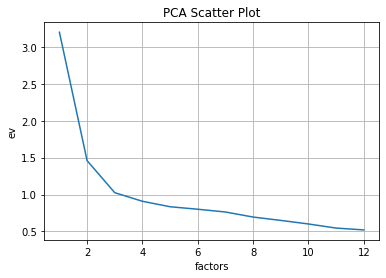

In [28]:
import matplotlib.pyplot as plt
x_axis = range(1, 13)
y_axis = ev
plt.plot(x_axis, y_axis)
plt.title('PCA Scatter Plot')
plt.xlabel('factors')
plt.grid()
plt.ylabel('ev')

In [29]:
no_retained_factors = 4
fa = FactorAnalyzer(n_factors = no_retained_factors, method='principal', rotation= 'varimax')
fa.fit(df_total)

FactorAnalyzer(method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={})

In [30]:
fa.loadings_

array([[ 0.32939995,  0.2362115 , -0.00414677,  0.50193214],
       [ 0.1795385 ,  0.3319801 ,  0.61836249,  0.1549262 ],
       [ 0.2368214 , -0.00563758,  0.81599493, -0.00887895],
       [ 0.68687752,  0.01909636,  0.19158553,  0.23295905],
       [-0.09606552,  0.67512105,  0.32613649, -0.02295826],
       [ 0.76642841,  0.00921079,  0.11781064,  0.00859492],
       [ 0.64683037,  0.13438844,  0.20834277,  0.20125248],
       [ 0.6946612 ,  0.14756025,  0.02615148, -0.09734853],
       [ 0.05534442,  0.70812824,  0.15283828, -0.00322461],
       [ 0.15194929,  0.65642374, -0.11484935,  0.00995876],
       [ 0.30838911,  0.44976999,  0.03473096,  0.26259938],
       [ 0.03373688,  0.09442731, -0.08895628, -0.86804619]])

In [31]:
df_loadings = pd.DataFrame(fa.loadings_, index = df_total.columns, columns = ['F0', 'F1', 'F2', 'F3'])
df_loadings.style.background_gradient()

,F0,F1,F2,F3
att1,0.329400,0.236211,-0.004147,0.501932
att2,0.179539,0.331980,0.618362,0.154926
att3,0.236821,-0.005638,0.815995,-0.008879
mo1,0.686878,0.019096,0.191586,0.232959
pcb1,-0.096066,0.675121,0.326136,-0.022958
mo2,0.766428,0.009211,0.117811,0.008595
att4,0.646830,0.134388,0.208343,0.201252
sn1,0.694661,0.147560,0.026151,-0.097349
pcb2,0.055344,0.708128,0.152838,-0.003225
pcb3,0.151949,0.656424,-0.114849,0.009959


In [32]:
fa.get_communalities()

array([0.41625327, 0.54881916, 0.72204271, 0.56314033, 0.57190911,
       0.60145057, 0.52035906, 0.51448885, 0.52787855, 0.46727026,
       0.36756156, 0.7714721 ])

In [34]:
df_communalities = pd.DataFrame(fa.get_communalities(), index = df_total.columns, columns = ['Communalitites'])
df_communalities

,Communalitites
att1,0.416253
att2,0.548819
att3,0.722043
mo1,0.563140
pcb1,0.571909
mo2,0.601451
att4,0.520359
sn1,0.514489
pcb2,0.527879
pcb3,0.467270


In [35]:
fa.get_factor_variance()

(array([2.28860192, 1.80565795, 1.29494644, 1.20343921]),
 array([0.19071683, 0.1504715 , 0.1079122 , 0.1002866 ]),
 array([0.19071683, 0.34118832, 0.44910053, 0.54938713]))

In [38]:
df_variance = pd.DataFrame(fa.get_factor_variance(), index = ['Variance', 'Prop Variance', 'Cum Variance'],
columns = ['F0', 'F1', 'F2', 'F3'])
df_variance

,F0,F1,F2,F3
Variance,2.288602,1.805658,1.294946,1.203439
Prop Variance,0.190717,0.150471,0.107912,0.100287
Cum Variance,0.190717,0.341188,0.449101,0.549387


In [40]:
df_Factors = fa.fit_transform(df_total)
df_Factors

array([[ 0.52742197,  0.70736564,  0.43410633,  0.64983537],
       [-0.24660804,  1.26492923, -0.56530268,  0.49055321],
       [-1.17896988, -0.07141934,  0.73571176,  0.34261339],
       ...,
       [ 0.37278616,  0.27759822,  0.35537579, -1.52388191],
       [ 0.27671106,  0.09769862, -0.44102737, -0.45189415],
       [-0.89788391, -0.65866183, -0.85823569,  0.0205819 ]])

In [41]:
df_Factors = pd.DataFrame(df_Factors, columns=['F0', 'F1', 'F2', 'F3'])
df_Factors

,F0,F1,F2,F3
0,0.527422,0.707366,0.434106,0.649835
1,-0.246608,1.264929,-0.565303,0.490553
2,-1.178970,-0.071419,0.735712,0.342613
3,0.100725,-1.425109,0.217505,0.372511
4,2.050150,0.416587,-1.919344,1.446150
...,...,...,...,...
1996,1.016186,0.558798,-1.982449,-0.102495
1997,-0.794289,-0.978153,-0.606681,0.127093
1998,0.372786,0.277598,0.355376,-1.523882
1999,0.276711,0.097699,-0.441027,-0.451894
